# Heart Disease Prediction: Modelling

Perform supervised learning machine learning project on a "Cardiovascular Diseases" dataset. This dataset is originally from Kaggle. The objective of the dataset is to diagnostically predict whether a patient has heart disease,
based on certain diagnostic measurements included in the dataset. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./data/scaler.csv')
df.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Sex_Female,Sex_Male,Heart_Disease
0,-2.453624,-0.757981,-1.855999,-0.327999,-0.327302,-0.500733,-0.401235,1.433608,0.983082,-1.934174,-2.386101,-2.159624,1.210405,-0.621626,0.006665,0.059662,0.664357,0.963321,-0.963321,0
1,0.455490,0.468728,-1.855999,-0.327999,-0.327302,-0.500733,2.492304,-0.697541,0.983082,-0.526840,-0.303613,-0.051639,-0.826170,-0.621626,0.006665,-1.012228,-0.267626,0.963321,-0.963321,1
2,0.455490,0.468728,0.538794,-0.327999,-0.327302,-0.500733,2.492304,-0.697541,0.415464,-0.714485,0.227668,0.742497,-0.826170,-0.133847,-0.716871,-0.811248,1.130348,0.963321,-0.963321,0
3,-2.453624,0.468728,0.538794,-0.327999,-0.327302,-0.500733,2.492304,-0.697541,1.266891,0.880494,0.461450,0.015817,-0.826170,-0.621626,0.006665,0.997565,0.198366,-1.038076,1.038076,1
4,-0.514215,0.468728,-1.855999,-0.327999,-0.327302,-0.500733,-0.401235,-0.697541,1.550700,1.912539,0.227668,-0.652606,1.210405,-0.621626,-0.877656,-0.744255,-0.733617,-1.038076,1.038076,0


In [2]:
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [3]:
# Original X, y
X = df.drop(['Heart_Disease'], axis=1)
y = df['Heart_Disease']

# Splitting the training, testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
classifiers = [LogisticRegression(), 
               KNeighborsClassifier(5),
               DecisionTreeClassifier(max_depth=10),
               RandomForestClassifier(n_estimators=10),
               XGBClassifier()] 
              

## Baseline Modelling

Model: LogisticRegression

Accuracy: 0.9196016516881225
Precision: 0.5237315875613748
Recall: 0.06407689227072487
F1-Score: 0.11418376449598573
ROC-AUC: 0.8377660846157512
--------------------------------------------------
Model: KNeighborsClassifier

Accuracy: 0.9110841227430977
Precision: 0.32944406314344543
Recall: 0.09611533840608731
F1-Score: 0.14881413734304758
ROC-AUC: 0.692106357864987
--------------------------------------------------
Model: DecisionTreeClassifier

Accuracy: 0.9179823496073193
Precision: 0.4433811802232855
Recall: 0.05566680016019223
F1-Score: 0.0989147838462907
ROC-AUC: 0.8188945513354949
--------------------------------------------------
Model: RandomForestClassifier

Accuracy: 0.9163306614849
Precision: 0.39146800501882056
Recall: 0.062474969963956746
F1-Score: 0.1077534104645139
ROC-AUC: 0.7517879597551205
--------------------------------------------------
Model: XGBClassifier

Accuracy: 0.9191968261679216
Precision: 0.504149377593361
Recall: 0.04865839006

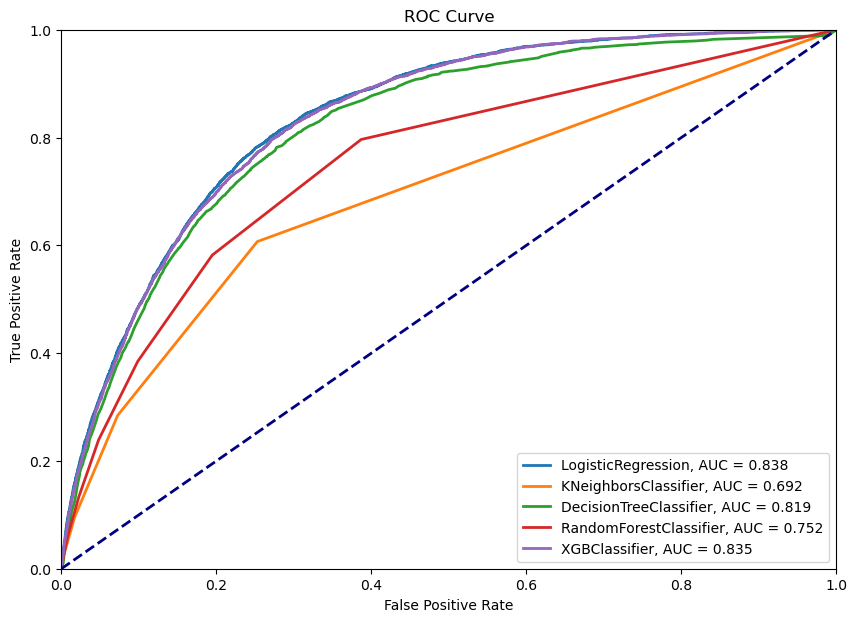

In [5]:
# write ouput to the file
f = open('output/baseline_result.txt','w')


plt.figure(figsize=(10,7))

# Train the models and plot the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    yproba = model.predict_proba(X_test)[::,1]
    roc_auc = roc_auc_score(y_test, yproba)
    accuracy = accuracy_score(y_test, y_pred)    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'Model: {cls.__class__.__name__}\n')
    print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {f1}\nROC-AUC: {roc_auc}')
    print(50*'-')
    
    print(f'Model: {cls.__class__.__name__}\n', file=f)
    print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {f1}\nROC-AUC: {roc_auc}', file=f)
    print(50*'-', file=f)
       
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    plt.plot(fpr, tpr, lw=2, label=cls.__class__.__name__+', AUC = %0.3f' % roc_auc)

    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('output/baseline_roc_curve.jpeg')
plt.show()
f.close()

## STOKE For Training Set

In [6]:
# Resample
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state = 5)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

Model: LogisticRegression

Accuracy: 0.7392599789490729
Precision: 0.20851264826283195
Recall: 0.7955546655987185
F1-Score: 0.3304224883566201
ROC-AUC: 0.8369427467574291
--------------------------------------------------
Model: KNeighborsClassifier

Accuracy: 0.7634037729738483
Precision: 0.1803921568627451
Recall: 0.5434521425710853
F1-Score: 0.2708717999900195
ROC-AUC: 0.7154132623918528
--------------------------------------------------
Model: DecisionTreeClassifier

Accuracy: 0.872917172698567
Precision: 0.28567137278462
Recall: 0.38085702843412095
F1-Score: 0.3264675592173018
ROC-AUC: 0.8116697278502318
--------------------------------------------------
Model: RandomForestClassifier

Accuracy: 0.9057242328556392
Precision: 0.3209342560553633
Recall: 0.1485782939527433
F1-Score: 0.20312072269367643
ROC-AUC: 0.7678946876277254
--------------------------------------------------
Model: XGBClassifier

Accuracy: 0.9184033681483281
Precision: 0.4617996604414261
Recall: 0.054465358430116

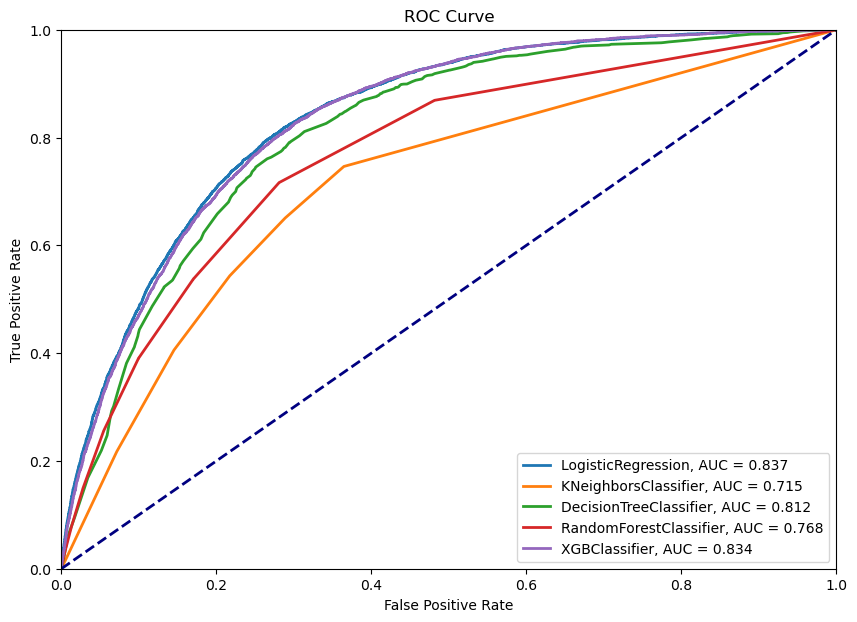

In [7]:
# write ouput to the file
f = open('output/smote_result.txt','w')
plt.figure(figsize=(10,7))

# Train the models and plot the results
for cls in classifiers:
    model = cls.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    yproba = model.predict_proba(X_test)[::,1]
    roc_auc = roc_auc_score(y_test, yproba)
    accuracy = accuracy_score(y_test, y_pred)    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'Model: {cls.__class__.__name__}\n')
    print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {f1}\nROC-AUC: {roc_auc}')
    print(50*'-')
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    plt.plot(fpr, tpr, lw=2, label=cls.__class__.__name__+', AUC = %0.3f' % roc_auc)

    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('output/smote_roc_curve.jpeg')
plt.show()
f.close()

## PCA

In [8]:
# Read pca data
df = pd.read_csv('./data/pca_scaler.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Heart_Disease
0,-3.170019,0.570658,-1.048852,-2.855468,0.296369,2.145411,-0.413329,1.186202,-0.924026,1.053639,-1.289027,-0.238067,0.479869,0.001134,0
1,-1.531060,1.102219,0.449579,-0.080593,-2.150428,0.980217,-0.595515,1.124640,0.260449,-0.105237,1.086724,1.242489,-0.023888,-0.744161,1
2,-0.889941,0.782701,1.128936,0.494812,-1.230420,0.448036,0.420473,1.103469,1.405735,-0.602930,2.055844,-0.240712,0.888411,-0.240122,0
3,1.434363,1.511302,-0.812050,1.042738,-0.979219,2.263482,-0.926101,0.068078,0.266673,-0.336790,1.434448,0.373696,0.713722,0.833188,1
4,1.848763,0.808636,-1.156039,-1.557470,-1.169962,0.295879,-1.226340,0.572849,-0.322285,-0.001934,-1.032062,0.299432,-1.641323,-0.120364,0


In [9]:
# Original X, y
X = df.drop(['Heart_Disease'], axis=1)
y = df['Heart_Disease']

# Splitting the training, testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# Resample
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state = 5)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

Model: LogisticRegression

Accuracy: 0.7327989636466683
Precision: 0.19900601621763014
Recall: 0.7617140568682419
F1-Score: 0.3155668007797918
ROC-AUC: 0.8207840599854586
--------------------------------------------------
Model: KNeighborsClassifier

Accuracy: 0.7597927293336572
Precision: 0.17746164940343517
Recall: 0.5420504605526631
F1-Score: 0.26738443303042275
ROC-AUC: 0.710903776027154
--------------------------------------------------
Model: DecisionTreeClassifier

Accuracy: 0.685223868512671
Precision: 0.1760484413545638
Recall: 0.7859431317581097
F1-Score: 0.2876616951885375
ROC-AUC: 0.7983592449555771
--------------------------------------------------
Model: RandomForestClassifier

Accuracy: 0.8616144441745608
Precision: 0.24751208416263862
Recall: 0.3486183420104125
F1-Score: 0.2894911872297971
ROC-AUC: 0.7720575026354101
--------------------------------------------------
Model: XGBClassifier

Accuracy: 0.7369929560359485
Precision: 0.1987680771290841
Recall: 0.7430917100520

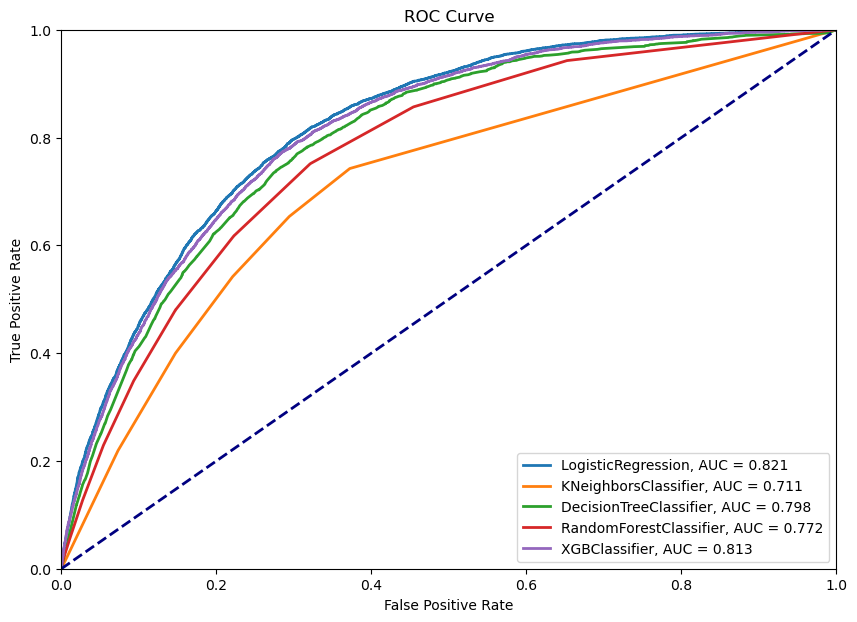

In [11]:
# write ouput to the file
f = open('output/pca_result.txt','w')

plt.figure(figsize=(10,7))

# Train the models and plot the results
for cls in classifiers:
    model = cls.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    yproba = model.predict_proba(X_test)[::,1]
    roc_auc = roc_auc_score(y_test, yproba)
    accuracy = accuracy_score(y_test, y_pred)    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'Model: {cls.__class__.__name__}\n')
    print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {f1}\nROC-AUC: {roc_auc}')
    print(50*'-')
    
    print(f'Model: {cls.__class__.__name__}\n', file=f)
    print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {f1}\nROC-AUC: {roc_auc}', file=f)
    print(50*'-', file=f)
       
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    plt.plot(fpr, tpr, lw=2, label=cls.__class__.__name__+', AUC = %0.3f' % roc_auc)

    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('output/pca_roc_curve.jpeg')
plt.show()
f.close()